In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X,y = make_circles(n_samples=500,noise=0.1,random_state=2)

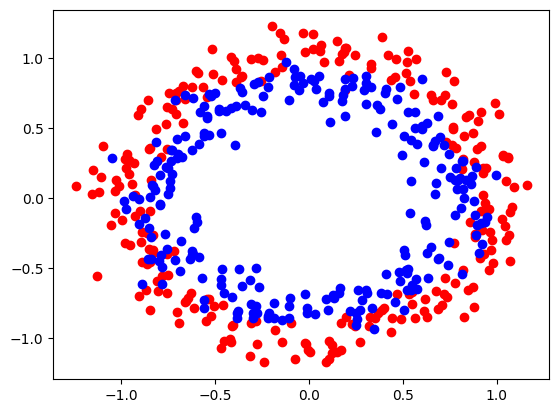

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0],X[y==0,1],color = 'red')
plt.scatter(X[y==1,0],X[y==1,1],color = 'blue')

In [3]:
X   #X有兩欄

array([[-0.90305944, -0.09159871],
       [ 0.66990477,  0.40615519],
       [ 0.25323756, -0.82262499],
       [-0.90349802, -0.18644569],
       [ 0.77682554, -0.60938586],
       [-0.31426606, -0.5844962 ],
       [ 1.07052376, -0.10299344],
       [-0.10714131, -0.85607473],
       [-0.58011068,  0.61762338],
       [ 0.10440064,  0.74997598],
       [ 0.63306152, -0.57082065],
       [-0.12094271,  0.96791867],
       [-0.65670426, -0.73331633],
       [-0.95626939, -0.33708266],
       [-0.74096902,  0.12091702],
       [ 0.3221823 , -0.91623157],
       [-0.36849317,  0.78534052],
       [ 0.45803679, -0.74541406],
       [-0.10632021,  0.70256493],
       [-0.31633027, -1.13029702],
       [ 0.5738178 , -0.65028718],
       [-0.62440449,  0.7953054 ],
       [ 0.70277472,  0.21763464],
       [-0.79302577, -0.04037972],
       [-0.03024067,  1.18029485],
       [-0.46908198, -1.06923209],
       [ 0.91721968,  0.3749028 ],
       [-0.65846638,  0.44445143],
       [ 0.57009773,

In [4]:
y     #y為一維的，有0和1 兩個類別

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

切割 train: test = 7:3，並利用下列演算法做適當預處理及參數(請自行查閱官方說明)

設定後訓練模型、算出正確率及畫出決策區域圖 random_state = 1

# Perception

In [7]:
from sklearn.linear_model import Perceptron

數據前處理

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

資料切割

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

訓練模型

In [8]:
clf = Perceptron(random_state=1)
clf.fit(X_train, y_train)

Perceptron(random_state=1)

計算準確率

In [9]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.4866666666666667


繪製決策區域圖

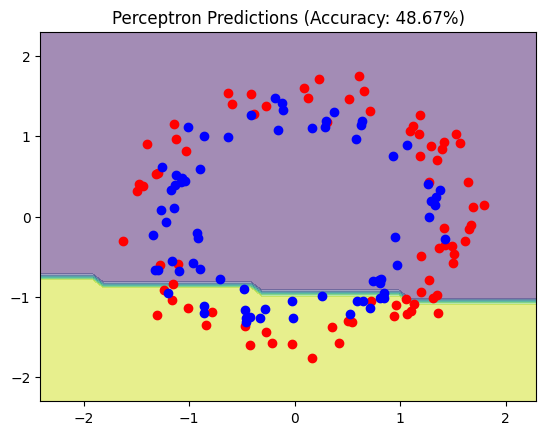

In [10]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5       #取出X軸的最小跟最大數值，並將x、y擴大0.5單位，使網格邊界更加密集
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))    #X、y軸座標，meshgrid()建立一個網格座標矩陣
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))  
""" .ravel()是將多維向量轉成一維，np.c_是將兩個一維向量連成二維，
在使用 clf.predict()前，先對網格數據進行標準化，讓訓練數據的標準化相同，可使預測結果更準確。
"""

Z = Z.reshape(xx.shape)  #Z是用meshgrid(xx,yy)生成的座標矩陣，座標矩陣的形狀是相同的，所以Z的形狀應該與xx的形狀相同，才能將預測結果在座標系中顯示出來。
plt.contourf(xx, yy, Z, alpha=0.5)   #contourf() 可透過顏色和等高線的密度來顯示資料的變化

plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='red')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='blue')
plt.title("Perceptron Predictions (Accuracy: {:.2f}%)".format(accuracy * 100))
plt.show()

Logistic Regression

Accuracy: 0.41333333333333333


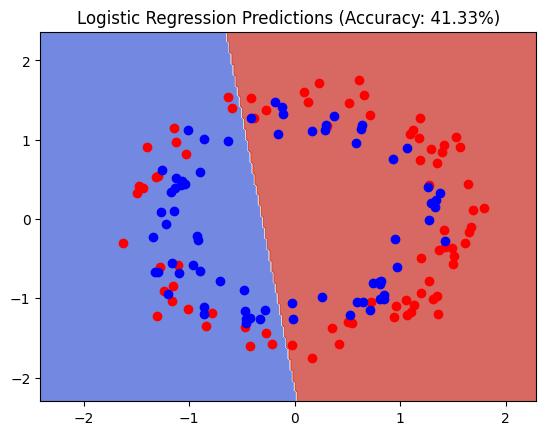

In [19]:
from sklearn.linear_model import LogisticRegression

X, y = make_circles(n_samples=500, noise=0.1, random_state=2)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

h = .02  
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='blue')
plt.title("Logistic Regression Predictions (Accuracy: {:.2f}%)".format(accuracy * 100))
plt.show()


Neuron Network

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 0.6970 - accuracy: 0.4886 - val_loss: 0.6862 - val_accuracy: 0.5333
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5200 - val_loss: 0.6915 - val_accuracy: 0.4800
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5286 - val_loss: 0.6971 - val_accuracy: 0.4867
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5343 - val_loss: 0.6998 - val_accuracy: 0.4600
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5286 - val_loss: 0.7022 - val_accuracy: 0.4800
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5371 - val_loss: 0.7044 - val_accuracy: 0.4533
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5457 - val_loss: 0.7058 - val_accuracy: 0.4533
Epoch 8/100
3

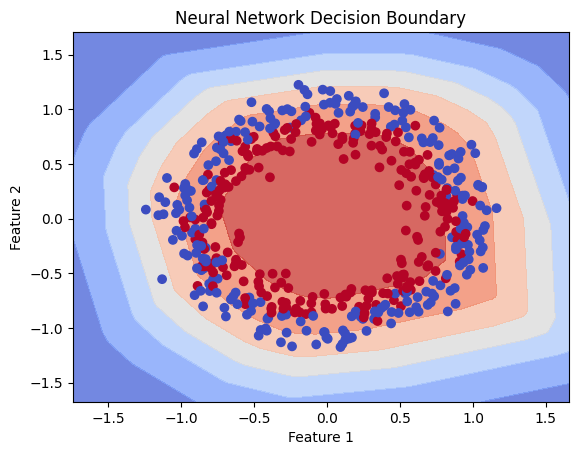

In [23]:
from keras.models import Sequential
from keras.layers import Dense


X, y = make_circles(n_samples=500, noise=0.1, random_state=2)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(30, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

h = 0.02  
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Decision Boundary')
plt.show()
